# **Week 3: Python Review Double Slit Experiment Simulator**
---

### **Description**
In today's lab, you will review variables, functions, and objects. Then, you will use these skills to explore a simulator of the double slit experiment.

<br>

### **Lab Structure**
**Part 1**: [Python Review](#p1)

**Part 2**: [Using the Double Slit Experiment Simulator](#p2)

**Part 3**: [Modifying the Double Slit Experiment Simulator](#p3)

**Part 4**: [Homework](#p4)


<br>

### **Resources**
* [Double Slit Simulator Documentation](https://the-codingschool.github.io/doubleSlit/documentation/doubleSlit.html)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
# @title
#!git clone https://github.com/the-codingschool/doubleSlit.git
#from doubleSlit.doubleSlit import doubleSlit, waveFunction

import matplotlib.pyplot as plt
import numpy as np
import scipy

class waveFunction():
  def __init__(self,d, distance_to_screen,measure_slit):
    self.d = d
    self.distance_to_screen = distance_to_screen
    self.measure_slit= measure_slit
    if not self.measure_slit:
      self.values = np.linspace(-10,10,num=1000)
      self.norm = scipy.integrate.trapezoid(self.evaluate_unnormalized(self.values),self.values)
      self.probs = [0]
      self.probs.extend([scipy.integrate.trapezoid(self.evaluate(np.linspace(self.values[i],self.values[i+1],num=100)),np.linspace(self.values[i],self.values[i+1],num=100)) for i in range(999)])
      self.probs = self.probs/sum(self.probs)
    else:
      self.values = [-1*self.d/2,self.d/2]
      self.norm = 1
      self.probs = [0.5,0.5]
  def evaluate(self,x):
    if not self.measure_slit:
      return np.cos(np.pi * self.d* x/self.distance_to_screen)**2/self.norm
    else:
      if float(x)== float(-1*self.d/2):
        return 0.5
      elif float(x)== float(self.d/2):
        return 0.5
      else:
        return 0
  def measure(self):
    temp_value = np.random.choice(self.values, p=self.probs)
    if self.measure_slit:
      temp_value += np.random.normal(scale = 0.2)
    else:
      temp_value += np.random.uniform(low=-0.01,high=0.01)
    return temp_value
  def evaluate_unnormalized(self,x):
    return np.cos(np.pi * self.d * x/self.distance_to_screen)**2

class doubleSlit():
  def __init__(self,slit_dist = 1, distance_to_screen = 10, screen_width = 200, screen_height=100, measure_slit = False):
    self.slit_dist = slit_dist
    self.distance_to_screen = distance_to_screen
    self.detections_x = []
    self.detections_y = []
    self.screen_width = screen_width
    self.screen_height = screen_height
    self.measure_slit = measure_slit
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def fire_electron(self):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    detected_x = self.distance_to_screen*np.tan(self.wavefunction.measure())
    self.detections_x.append(self.wavefunction.measure())
    self.detections_y.append(np.random.normal(scale=1.7))
  def show_screen(self):
    plt.hist2d(self.detections_x,self.detections_y,[self.screen_width,self.screen_height],range=[[-10,10],[-5,5]])
    plt.minorticks_on()
    plt.show()
  def show_hist(self):
    plt.hist(self.detections_x,bins=self.screen_width)
    plt.xlabel("Distance from center")
    plt.ylabel("Number of Electrons Detected")
    plt.minorticks_on()
    plt.show()
  def clear_screen(self):
    self.detections_x = []
    self.detections_y = []
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def electron_beam(self, num_electrons = 5000):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    for i in range(num_electrons):
      self.fire_electron()



class baby():
  def __init__(self,age=0, mood="crying", hunger="hungry"):
    self.age = age
    self.mood = mood
    self.hunger = hunger
  def feed(self):
    self.hunger = "full"
  def play(self):
    self.mood = "happy"

class plant():
  def __init__(self):
    self.planted = 0
    self.day_of_last_growth = 0
    self.day = 0
    self.water = 0
    self.light = 0
    self.health = 10
    self.stage = 0
    self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
    self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])

  def water_plant(self,amount):
    if amount > 0:
      print("You watered your plant.")
      self.water += round(amount)
    elif amount < 0:
      raise ValueError("You can't remove water from your plant! You will have to wait a bit for it to dry out.")
    else:
      print("You decided to not water your plant.")

  def set_light(self,level):
    if level <0:
      raise ValueError("You can't set the light level to negative values.")
    elif level > 10:
      raise ValueError("Your light is not that strong")
    else:
      self.light = round(level)
      print("You set the light to level " + str(self.light))

  def check_health(self):
    print("Your plant's health is a " + str(self.health)+ "/" + str(10+(5*self.stage))+".")
    print("If you had to rate the wetness of the soil, it would be a " + str(self.water)+ "/10.")
    print("Your light is turned up to " + str(self.light)+ ".")
    if self.stage == 10:
      print("Your plant is full grown.")

  def wait(self,num_days):
    for i in range(num_days):

      self.day += 1
      print('Day ' + str(self.day))
      if self.perfect_light > self.light:
        print("Your plant needs more light")
        self.health += -1*abs(self.perfect_light- self.light)/10
      elif self.perfect_light < self.light:
        print("Your plant needs less light")
        self.health += -1*abs(self.perfect_light- self.light)/10
      else:
        print("Your plant looks happy with the light it has.")
      if self.perfect_water > self.water:
        print("Your plant needs more water")
        self.health += -1*abs(self.perfect_water- self.water)/10
      elif self.perfect_water < self.water:
        print("Your plant needs less water")
        self.health += -1*abs(self.perfect_water- self.water)/10
      else:
        print("Your plant looks happy with the water it had.")
      if self.perfect_light == self.light and self.perfect_water == self.water:
        self.health = (self.health + 10+(5*self.stage))/2
        if self.day- self.day_of_last_growth >= 5 and self.stage < 10:
          print("Your plant grew a bit! Its preferances may have changed.")
          self.stage += 1
          self.health += 5
          self.day_of_last_growth = self.day
          self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
          self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
          if self.stage == 10:
            print("Congrats! Your plant is full grown.")
      self.water += -1*self.light
      if self.water < 0:
        self.water = 0
      if self.health <= 0:
        print("Your plant died! You decide to plant a new seed. Treat this one better!")
        self.planted = 0
        self.day_of_last_growth = 0
        self.day = 0
        self.water = 0
        self.light = 0
        self.health = 10
        self.stage = 0
        self.perfect_light = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])
        self.perfect_water = numpy.random.choice([1,2,3,4,5,6,7,8,9,10])

      print('\n')

<a name="p1"></a>

---
## **Part 1: Python Review**
---
In this part, you will practice python skills involving what we've learned so far.

####**Problem #1.1**

**Together**, write code that says `"Welcome to Lab 4!"`.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

In [ ]:
print("Welcome to Lab 4!")

Welcome to Lab 4!


####**Problem #1.2**

**Together** create a variable for your favorite animal. Then, using that variable, print `"My favorite animal is the 'animal'"`.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

In [ ]:
animal = "tiger"
print("My favorite animal is the ", animal)

My favorite animal is the  tiger .


####**Problem #1.3**

**Together,** debug the code shown below.

In [ ]:
groceries = apples, pears, and bananas
"I need to buy"
print(groceries)

SyntaxError: ignored

######**Solution**

In [ ]:
groceries = "apples, pears, and bananas"
print("I need to buy", groceries)

'I need to buy'

####**Problem #1.4**

**Independently**, debug the code shown below.

In [ ]:
height = 10
base = 5
area = .5*base*height
"The area is" area

SyntaxError: ignored

######**Solution**

In [ ]:
height = 10
base = 5
area = .5*base*height
print("The area is", area)

'The area is'

####**Problem #1.5**
Assign numerical values to the variables below. Then write code to calculate the area of a triangle using your variables. Finally print the area.

In [ ]:
base = # COMPLETE THIS CODE
height = # COMPLETE THIS CODE
area_triangle = # COMPLETE THIS CODE

######**Solution**

In [ ]:
base = 3
height = 5
area_triangle = .5*base*height
area_triangle

7.5


####**Problem #1.6**
Write code that finds the area of a square with the same side length as the base of your triangle. Print the area of the square.

In [ ]:
side = # COMPLETE THIS CODE
area_square = # COMPLETE THIS CODE

######**Solution**

In [ ]:
side = base
area_square = side**2
area_square

9


#### **Problem #1.7**

Create a new `baby` object, and output the `mood` attribute. Then, use its `play` method and output the `mood` attribute once again.

In [ ]:
aisha = baby()

# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
aisha = baby()
aisha.mood

'crying'

In [ ]:
aisha.play()
aisha.mood

'happy'

#### **Problem #1.8**

Do each of the following:


*   Create a new `baby` object. Output its age attribute.
*   Next, use its `feed` method, use its `play` method, and set its age attribute to 1.
* Then, output its `mood`, `hunger`, and new `age` attributes.





In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
taylor = baby()
taylor.age

0


In [ ]:
taylor.feed()
taylor.play()
taylor.age = 1

In [ ]:
taylor.mood
taylor.hunger
taylor.age

---

<center>

#### **Wait for Your Instructor to Continue**

---

#### **Problem #1.9**

Create a `plant` object using its corresponding function. Then, using the methods listed below, check its health, water it, set it's light level, wait three days, and check its health again.

* `check_health()`
* `water_plant(amount)`
* `set_light(level)`
* `wait(num_days)`

In [ ]:
rose = plant()

In [ ]:
rose.check_health()

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
rose = plant()

In [ ]:
rose.check_health()

Your plant's health is a 10/10.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 0.


In [ ]:
rose.water_plant(1)
rose.set_light(5)

You watered your plant.
You set the light to level 5


In [ ]:
rose.wait(3)

Day 1
Your plant looks happy with the light it has.
Your plant needs more water


Day 2
Your plant looks happy with the light it has.
Your plant needs more water


Day 3
Your plant looks happy with the light it has.
Your plant needs more water




In [ ]:
rose.check_health()

Your plant's health is a 7.1/10.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 5.


#### **Problem #1.10**

Create a `plant` object using its corresponding function. Then, check the value of its `perfect_light` attribute and set the light to this value using the `set_light(level)` method. Lastly, wait 5 days.

In [ ]:
cactus = plant()

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
cactus = plant()

In [ ]:
cactus.perfect_light

4

In [ ]:
cactus.set_light(cactus.perfect_light)

You set the light to level 4


In [ ]:
cactus.wait(5)

Day 1
Your plant looks happy with the light it has.
Your plant needs more water


Day 2
Your plant looks happy with the light it has.
Your plant needs more water


Day 3
Your plant looks happy with the light it has.
Your plant needs more water


Day 4
Your plant looks happy with the light it has.
Your plant needs more water


Day 5
Your plant looks happy with the light it has.
Your plant needs more water




#### **Problem #1.11**

Create a `plant` object using its corresponding function. Then, check the value of its `water` and `perfect_water` attributes and increase the water to the perfect value using the `water_plant(amount)` methods. Lastly, check its health using the `check_health()` method.

In [ ]:
cactus = plant()

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
cactus = plant()

In [ ]:
cactus.water

0

In [ ]:
cactus.perfect_water

8

In [ ]:
cactus.water_plant(cactus.perfect_water)

You watered your plant.


In [ ]:
cactus.check_health()

Your plant's health is a 10/10.
If you had to rate the wetness of the soil, it would be a 8/10.
Your light is turned up to 3.


#### **Problem #1.12**

Create a `plant` object using its corresponding function. Then, wait 10 days using the `wait(num_days)` method without changing the water or light levels.

In [ ]:
cactus = plant()

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
cactus = plant()

In [ ]:
cactus.wait(10)

Day 1
Your plant needs more light
Your plant needs more water


Day 2
Your plant needs more light
Your plant needs more water


Day 3
Your plant needs more light
Your plant needs more water


Day 4
Your plant needs more light
Your plant needs more water


Day 5
Your plant needs more light
Your plant needs more water
Your plant died! You decide to plant a new seed. Treat this one better!


Day 1
Your plant needs more light
Your plant needs more water


Day 2
Your plant needs more light
Your plant needs more water


Day 3
Your plant needs more light
Your plant needs more water


Day 4
Your plant needs more light
Your plant needs more water


Day 5
Your plant needs more light
Your plant needs more water




#### **Problem #1.13**

Rearrange the cells below such that you create the plant, ensure it has enough light and water, and then check its health after waiting a day.

In [ ]:
cactus.set_light(cactus.perfect_light)

In [ ]:
cactus.check_health()

In [ ]:
cactus = plant()

In [ ]:
cactus.wait(1)

In [ ]:
cactus.water_plant(cactus.perfect_water)

##### **Solution**

In [ ]:
cactus = plant()

In [ ]:
cactus.set_light(cactus.perfect_light)

You set the light to level 8


In [ ]:
cactus.water_plant(cactus.perfect_water)

You watered your plant.


In [ ]:
cactus.wait(1)

Day 5
Your plant looks happy with the light it has.
Your plant looks happy with the water it had.
Your plant grew a bit! Its preferances may have changed.




In [ ]:
cactus.check_health()

Your plant's health is a 15.0/15.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 8.


#### **Problem #1.14**

Debug the code shown below to ensure the plant is given 5 units of water.

In [ ]:
bonsai = plant()
bonsai.set_water(5)

AttributeError: 'plant' object has no attribute 'set_water'

##### **Solution**


In [ ]:
bonsai = plant()
bonsai.water_plant(5)

You watered your plant.


#### **Problem #1.15**

Debug the code shown below.

In [ ]:
cactus = plant
cactus.check_health

<function __main__.plant.check_health(self)>

In [ ]:
cactus.water_plant("1")
cactus.set_light("8")
cactus.check_health()

TypeError: ignored

In [ ]:
cactus.wait(3)
print(cactus.check_health)

TypeError: ignored

##### **Solution**

In [ ]:
cactus = plant()
cactus.check_health()

Your plant's health is a 10/10.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 0.


In [ ]:
cactus.water_plant(1)
cactus.set_light(8)
cactus.check_health()

You watered your plant.
You set the light to level 8
Your plant's health is a 10/10.
If you had to rate the wetness of the soil, it would be a 1/10.
Your light is turned up to 8.


In [ ]:
cactus.wait(3)
cactus.check_health()

Day 1
Your plant looks happy with the light it has.
Your plant looks happy with the water it had.
Day 2
Your plant looks happy with the light it has.
Your plant needs more water
Day 3
Your plant looks happy with the light it has.
Your plant needs more water
Your plant's health is a 9.8/10.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 8.


<a name="p2"></a>

---
## **Part 2: Using the Double Slit Experiment Simulator**
---

In this part, you will learn how to use the double slit experiment simulator.

#### **Problem #2.1**
**Together**, create a `doubleSlit` object using its associated function. All of its arguments are optional, so you do not need to put anything in the parentheses yet.


In [ ]:
my_experiment = # COMPLETE THIS CODE

###### **Solution**


In [ ]:
my_experiment = doubleSlit()

#### **Problem #2.2**
**Together,** use the appropriate method of the `doubleSlit` object to display the screen.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**


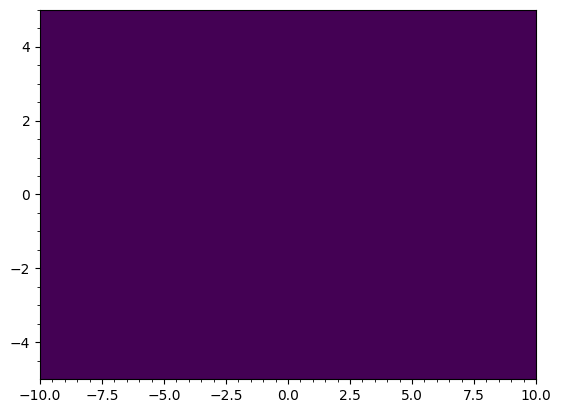

In [ ]:
my_experiment.show_screen()

#### **Problem #2.3**
**Together**, use the appropriate method of the `doubleSlit` object to fire a single electron at the screen. Then, display the screen again.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**


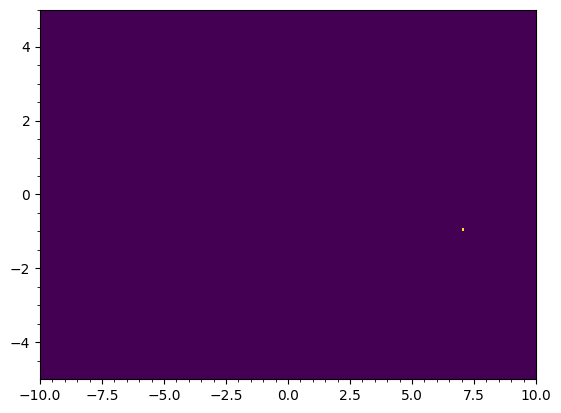

In [ ]:
my_experiment.fire_electron()
my_experiment.show_screen()

#### **Problem #2.4**

**Together**, create a  `doubleSlit` object so that you measure which slit the electron passes through. Then, fire an electron and display the screen.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

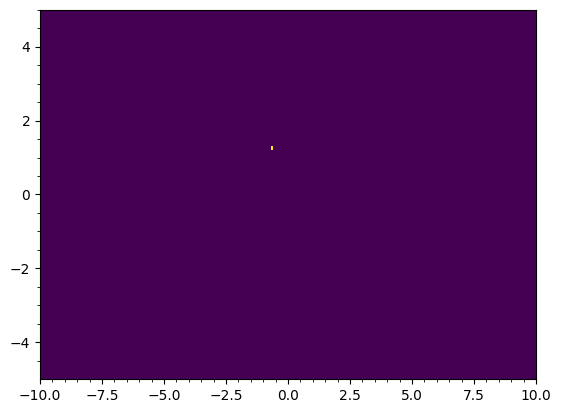

In [ ]:
my_experiment = doubleSlit(measure_slit=True)
my_experiment.fire_electron()
my_experiment.show_screen()

In [ ]:
# OR

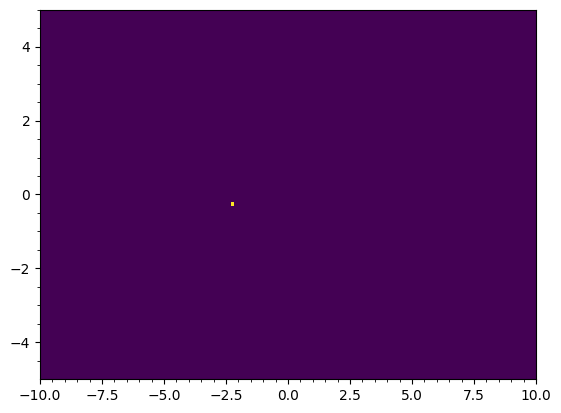

In [ ]:
my_experiment = doubleSlit()
my_experiment.measure_slit=True
my_experiment.fire_electron()
my_experiment.show_screen()

####**Problem #2.5**
**Together,** use the appropriate method to fire 500 electrons at the screen. Then, display the screen.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

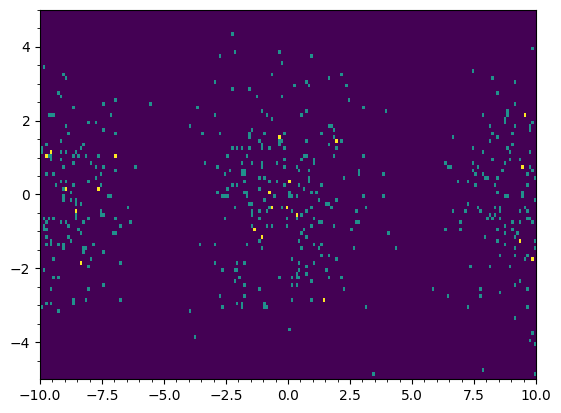

In [ ]:
my_experiment = doubleSlit()
my_experiment.electron_beam(num_electrons=500)
my_experiment.show_screen()

#### **Problem #2.6**
**Independently,** use the appropriate method to fire 10,000 electrons at the screen. Then, display the screen.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**


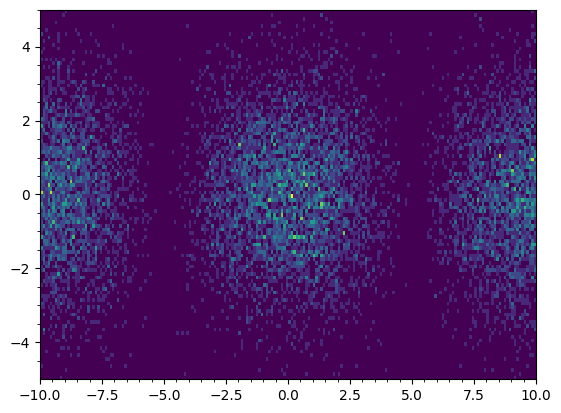

In [ ]:
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

#### **Problem #2.7**
**Independently,** create a  `doubleSlit` object so that you measure which slit the electron passes through. Then, fire 10000 electrons and display the screen.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

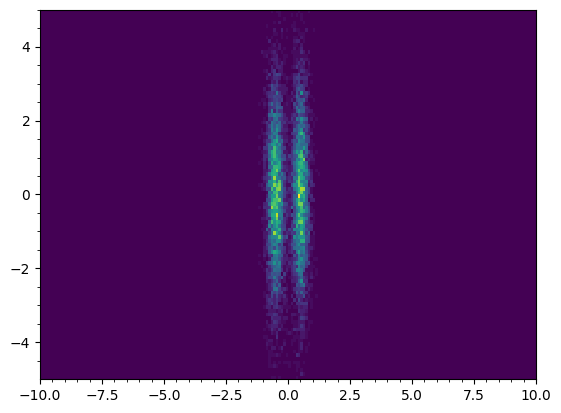

In [ ]:
my_experiment = doubleSlit(measure_slit=True)
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

In [ ]:
# OR

######**Solution**

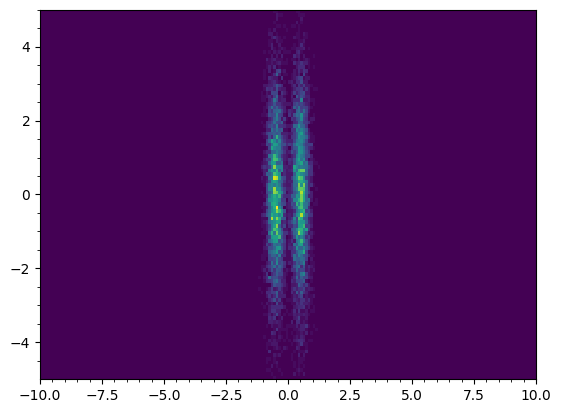

In [ ]:
my_experiment = doubleSlit()
my_experiment.measure_slit=True
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

---

<center>

### **Wait for Your Instructor to Continue**

---

<a name="p3"></a>

---
## **Part 3: Modifying the Double Slit Experiment Simulator**
---

In this part, you will see how certain modifications to the `doubleSlit` object affect the interference pattern shown on the screen.

#### **Problem #3.1**
**Together,** debug the code below.

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist=3
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

ValueError: ignored

###### **Solution**


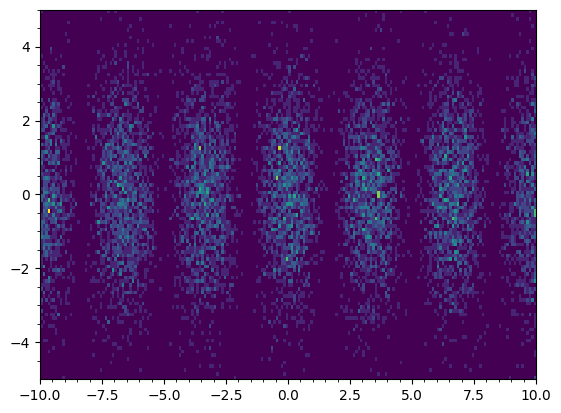

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist=3
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

#### **Problem #3.2**
**Together,** create a `doubleSlit` object that starts with a slit distance of 3.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**


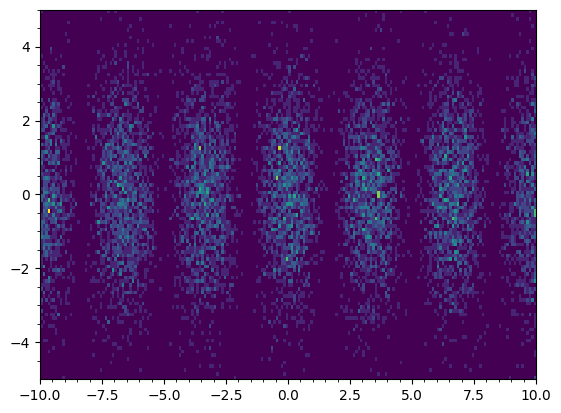

In [ ]:
my_experiment = doubleSlit(slit_dist=3)
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

####**Problem #3.3**

**Independently**, create a `doubleSlit` object with a slit distance of 6, and fire an electron beam of 10,000 electrons. How do you expect this to compare to the slit distance of 3?

In [ ]:
# COMPLETE THIS CODE

##### **Solution**


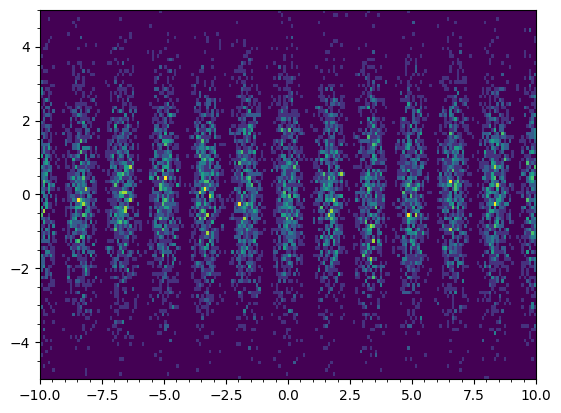

In [ ]:
my_experiment = doubleSlit(slit_dist=6)
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

####**Problem #3.4**

**Independently**, create a `doubleSlit` object with a slit distance of 50, and fire an electron beam of 10,000 electrons.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

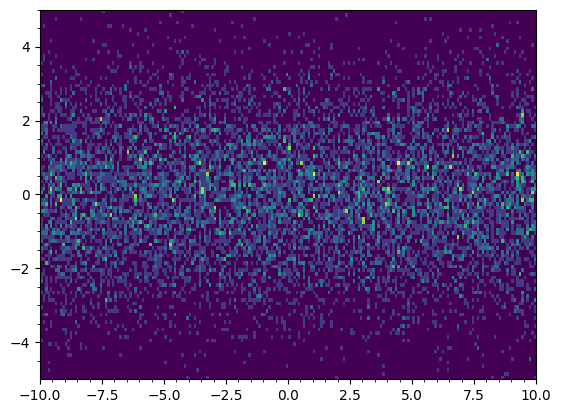

In [ ]:
my_experiment = doubleSlit(slit_dist=50)
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

#### **Problem #3.5**
**Independently**, explore how changing the distance between the slits changes the interference patters. For what range of slit distances do you see an interference pattern? Print the range that you find. **Note:** Do not measure the slit.


In [ ]:
# COMPLETE THIS CODE

###### **Solution**


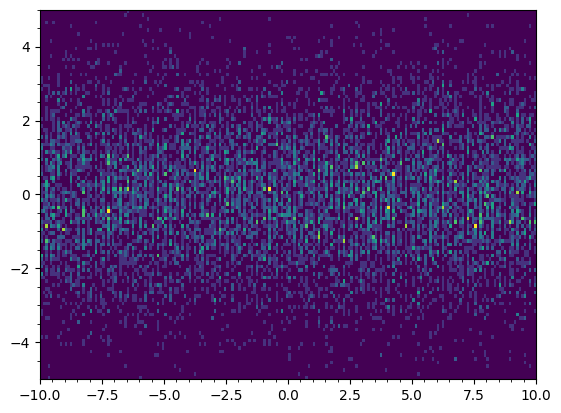

0.7-40


In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 40
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()
print("0.7-40")  #Approximately

Ans: 0.7-40 (about)

#### **Problem #3.6**
**Independently,** find the distances between bright spots for the following distances between the slit and the screen:
*  1
*  1.5
*  2
*  2.5
*  5
*  10

Keep the slit distance at its default value of 1. Record your results in the list `bright_spot_distances`, then run the code below to produce a line graph.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
distances_to_screen = [1,1.5,2,2.5,5,10]
bright_spot_distances = # COMPLETE THIS CODE

plt.plot(distances_to_screen,bright_spot_distances)
plt.xlabel("Distance Between Slits and Screen")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")

###### **Solution**


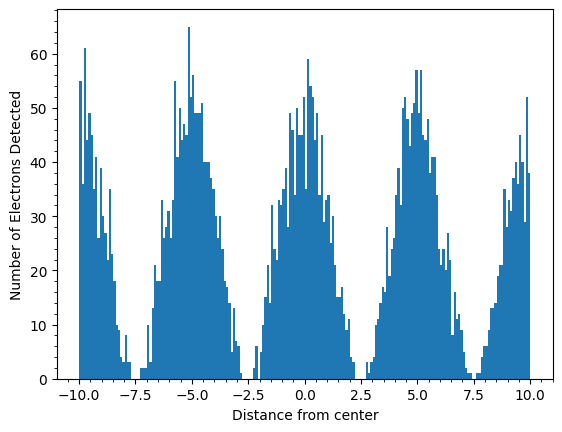

In [ ]:
my_experiment = doubleSlit()
my_experiment.distance_to_screen = 5
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=5000)
my_experiment.show_hist()

Text(0, 0.5, 'Distance Between Bright Spots in Interference Pattern')

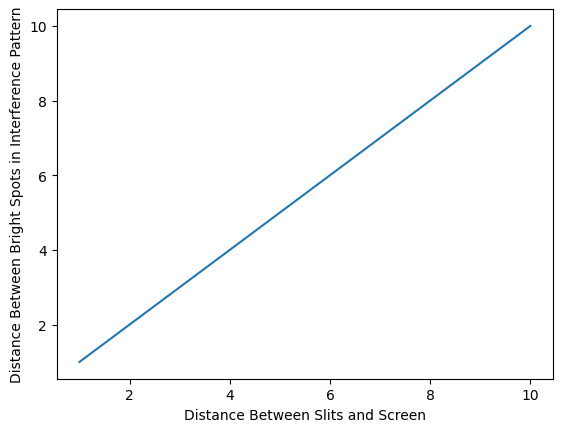

In [ ]:
distances_to_screen = [1,1.5,2,2.5,5,10]
bright_spot_distances = [1,1.5,2,2.5,5,10]

plt.plot(distances_to_screen,bright_spot_distances)
plt.xlabel("Distance Between Slits and Screen")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")

#### **Problem #3.7**
The plot shown below was generated with a `distance_to_screen` of 20. What `slit_dist` was used?

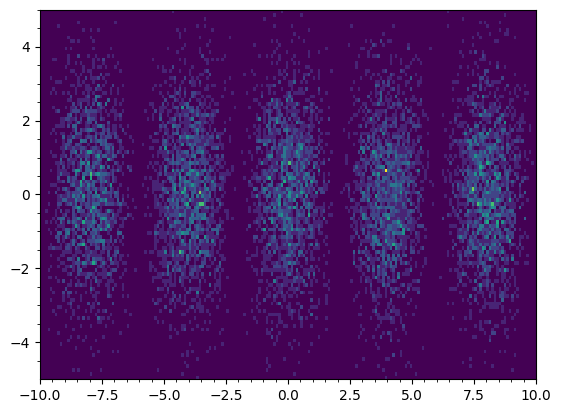

In [ ]:
# COMPLETE THIS CODE

###### **Solution**


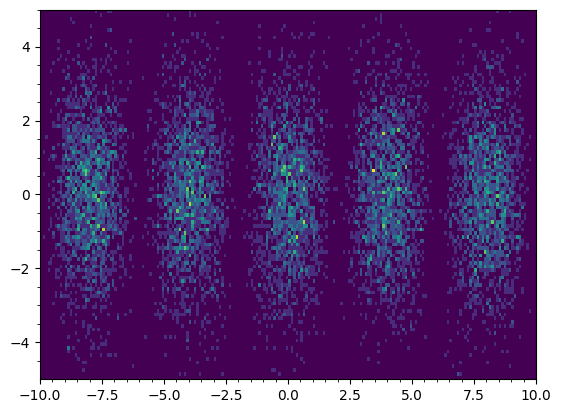

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 5
my_experiment.distance_to_screen = 20
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

#### **Problem #3.8 [CHALLENGE]**
**Independently,** search through the documentation to find a way to create a histogram of the x coordinates of the detections. Then, create a `doubleSlit` object with a `slit_dist` of 3, fire 5,000 electrons at the screen, the display a histogram of the detections. Print the distance between the bright spots on the screen.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

###### **Solution**


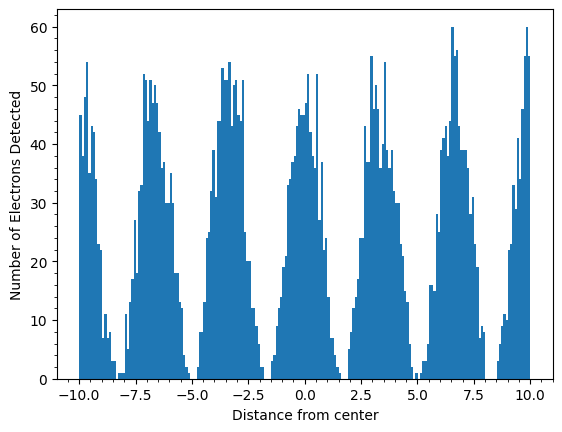

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 3
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=5000)
my_experiment.show_hist()

In [ ]:
print("~3.5")

~3.5


#### **Problem #3.9 [CHALLENGE]**
**Independently,** modify the code from problem #1.6 to find the distances between bright spots for the following slit distances:
*  1
*  1.5
*  2
*  5
*  10
*  20

Record your results in the list `bright_spot_distances`, then run the code below to produce a line graph.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
slit_distances = [1,1.5,2,5,10,20]
bright_spot_distances = [] #COMPLETE THIS LIST

plt.plot(slit_distances,bright_spot_distances)
plt.xlabel("Distance Between Slits")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")

###### **Solution**


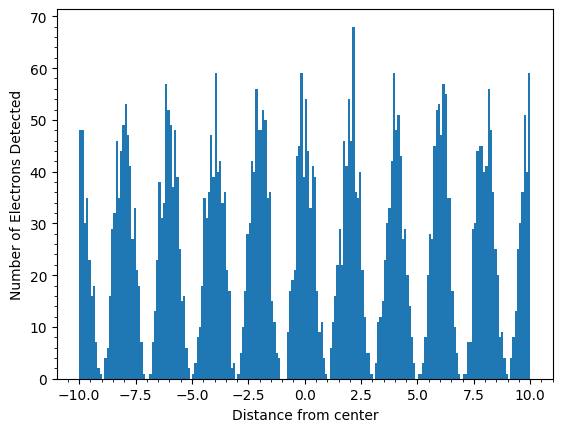

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 5
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=5000)
my_experiment.show_hist()

Text(0, 0.5, 'Distance Between Bright Spots in Interference Pattern')

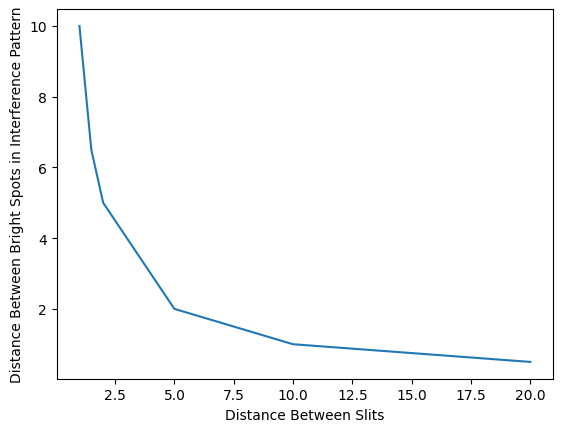

In [ ]:
slit_distances = [1,1.5,2,5,10,20]
bright_spot_distances = [10,6.5,5,2,1,0.5]

plt.plot(slit_distances,bright_spot_distances)
plt.xlabel("Distance Between Slits")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")

<a name="p4"></a>

---
##**Part 4: Homework**
---

This part extends your work from above and offers a chance to continue practicing your python skills.

<a name="p4.1"></a>

---
### **Part 4.1: The Double Slit Simulator**
---

####**Problem #4.1.1**

Complete the code below to:
1. Create a `doubleSlit` object with a slit distance of 5.
2. Then, use the appropriate method of the `doubleSlit` object to fire two electrons at the screen.
3. Lastly, display the screen.

In [ ]:
my_experiment = # COMPLETE THIS CODE
my_experiment.slit_dist = # COMPLETE THIS CODE

my_experiment.clear_screen()
my_experiment.# COMPLETE THIS CODE
my_experiment.# COMPLETE THIS CODE

my_experiment.show_screen()

######**Solution**

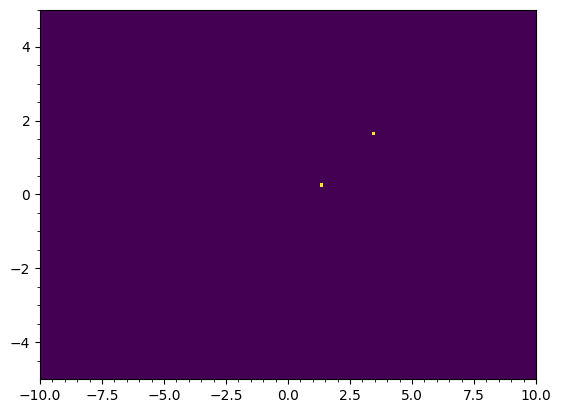

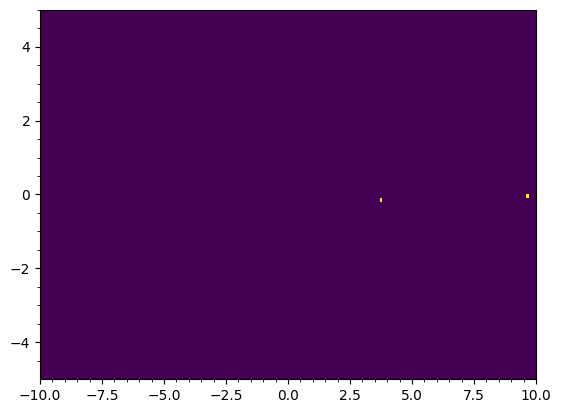

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 5

my_experiment.clear_screen()
my_experiment.fire_electron()
my_experiment.fire_electron()

my_experiment.show_screen()

#OR

my_experiment = doubleSlit(slit_dist = 5)
my_experiment.electron_beam(num_electrons=2)
my_experiment.show_screen()

####**Problem #4.1.2**
Fire 5 more electrons and display the screen.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

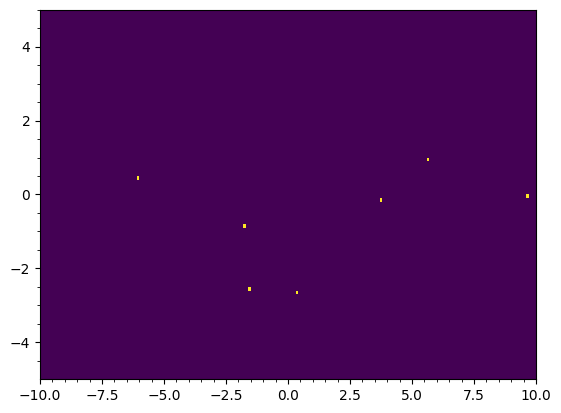

In [ ]:
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.show_screen()

####**Problem #4.1.3**
Fire 10 more electrons and display the screen.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

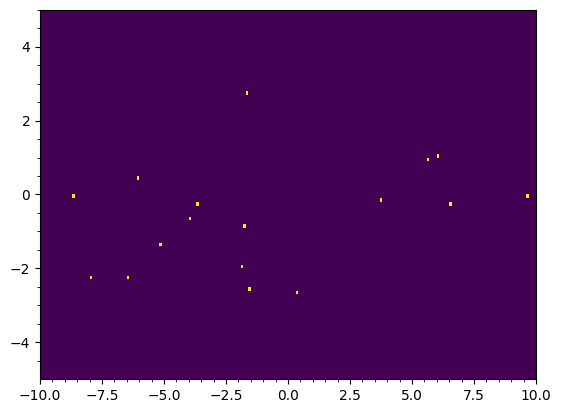

In [ ]:
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.show_screen()

####**Problem #4.1.4**
Using the `electron_beam` method, fire 20 more electrons and display the screen.

<br>

**NOTE**: You should see that for firing many electrons, the `electron_beam` method is much easier to use than the `fire_electron` method even though you could accomplish the same thing using either.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

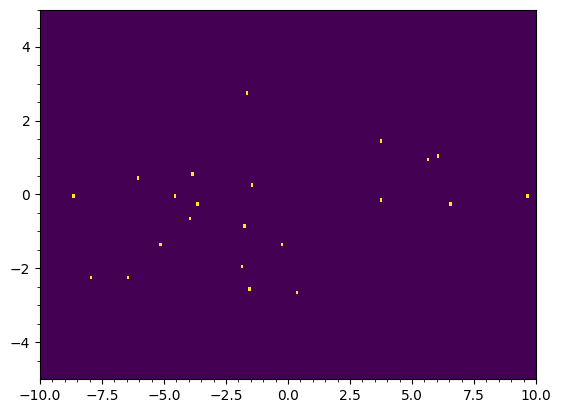

In [ ]:
my_experiment.electron_beam(num_electrons=20)

my_experiment.show_screen()

####**Problem #4.1.5**
Fire 100 more electrons and display the screen.

In [ ]:
# COMPLETE THIS CODE

######**Solution**

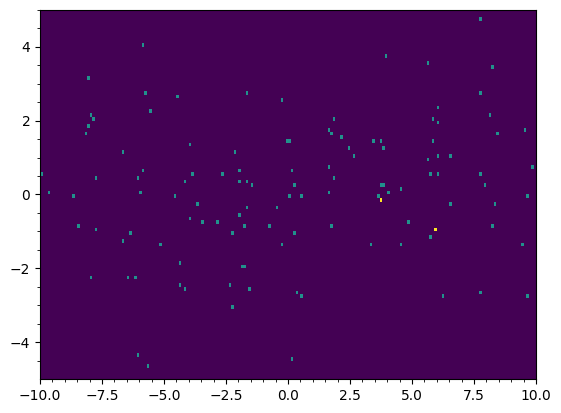

In [ ]:
my_experiment.electron_beam(num_electrons=100)

my_experiment.show_screen()

####**Problem #4.1.6**

Create four new `double_slit` objects, each with a different slit distance. Specifically use these distances (feel free to try any others you are interested in):
1. 0.5
2. 1
3. 10
4. 500

<br>

For each, fire 10,000 electrons and display the screen.

In [ ]:
slit_05 = doubleSlit(# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

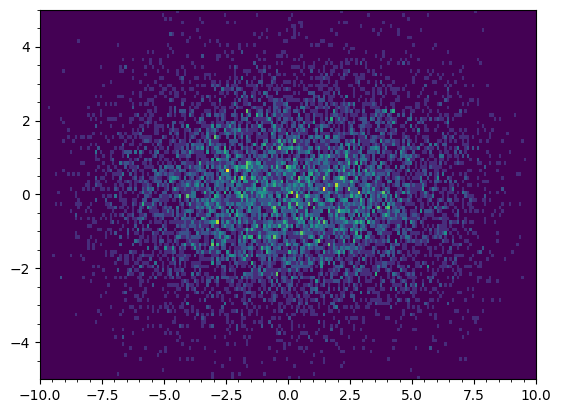

In [ ]:
slit_05 = doubleSlit(slit_dist = 0.5)

slit_05.electron_beam(num_electrons=10000)
slit_05.show_screen()

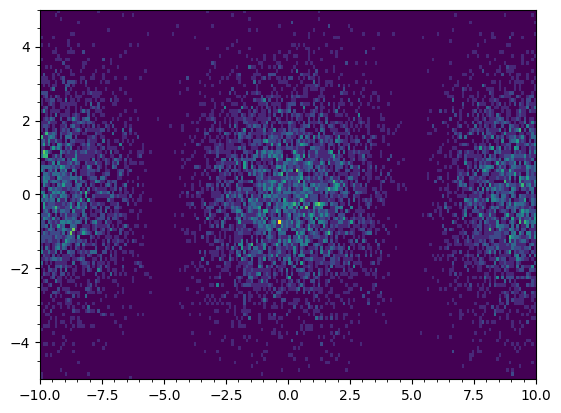

In [ ]:
slit_1 = doubleSlit(slit_dist = 1)

slit_1.electron_beam(num_electrons=10000)
slit_1.show_screen()

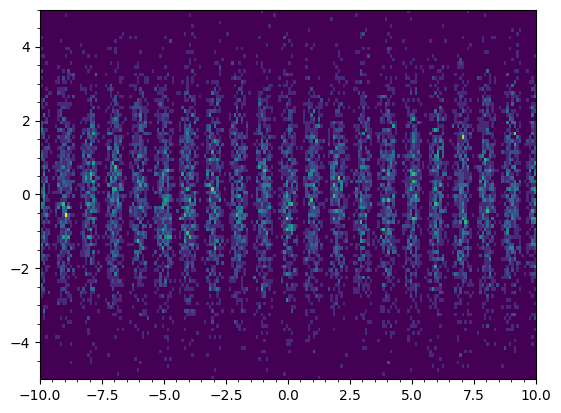

In [ ]:
slit_10 = doubleSlit(slit_dist = 10)

slit_10.electron_beam(num_electrons=10000)
slit_10.show_screen()

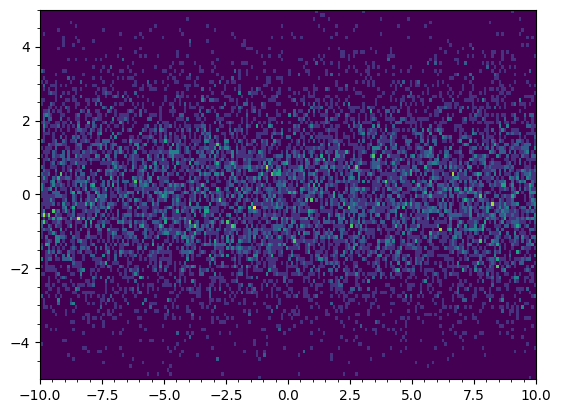

In [ ]:
slit_500 = doubleSlit(slit_dist = 500)

slit_500.electron_beam(num_electrons=10000)
slit_500.show_screen()

####**Problem #4.1.7**

Create two new `double_slit` objects where you:
1. *do not* measure which slit the electrons go through.
2. *do* measure which slit the electrons go through.

<br>

Then fire 10,000 electrons through each and display the screens.

In [ ]:
my_experiment_no_measure # COMPLETE THIS CODE

In [ ]:
my_experiment_measure # COMPLETE THIS CODE

######**Solution**

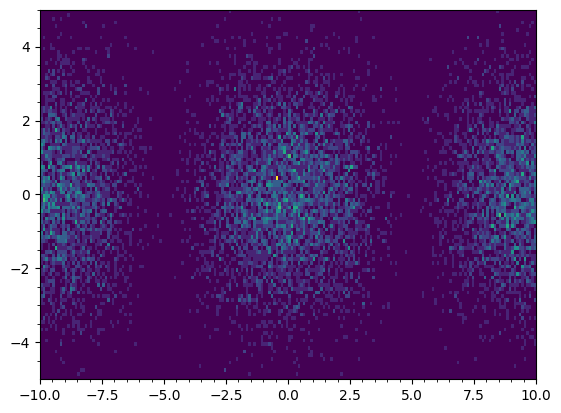

In [ ]:
my_experiment_no_measure = doubleSlit()

my_experiment_no_measure.electron_beam(num_electrons=10000)
my_experiment_no_measure.show_screen()

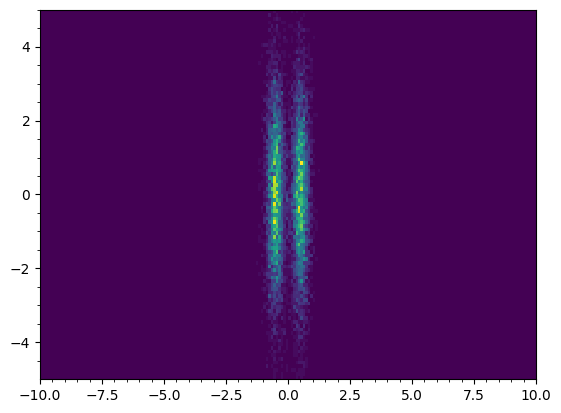

In [ ]:
my_experiment_measure = doubleSlit(measure_slit=True)
my_experiment_measure.electron_beam(num_electrons=10000)
my_experiment_measure.show_screen()

####**Problem #4.1.8**

Display the results of both experiments from the previous problem using the `show_hist()` method.

In [ ]:
my_experiment_no_measure # COMPLETE THIS CODE

In [ ]:
my_experiment_measure # COMPLETE THIS CODE

######**Solution**

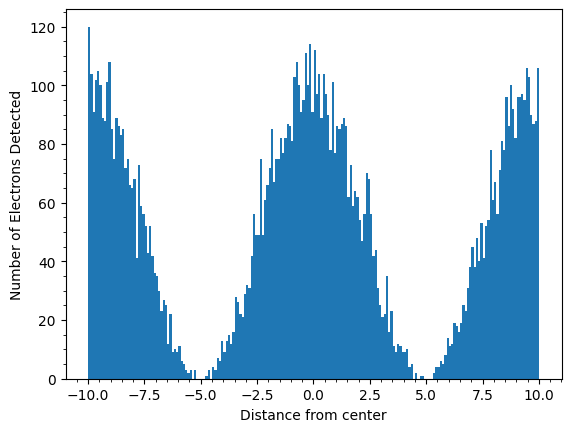

In [ ]:
my_experiment_no_measure.show_hist()

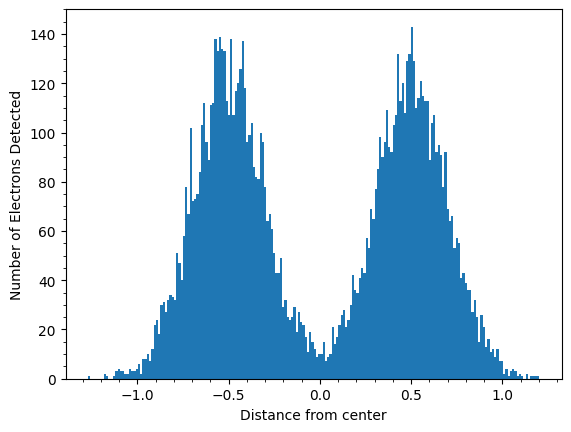

In [ ]:
my_experiment_measure.show_hist()

<a name="p4.2"></a>

---
### **Part 4.2: Python Basics [OPTIONAL]**
---

####**Problem #4.2.1**
Fill out the complete the variables below and run the code to create a "Mad Lib".

In [ ]:
place = # COMPLETE THIS CODE
animal = # COMPLETE THIS CODE
verb_ending_in_ing = # COMPLETE THIS CODE
noun = # COMPLETE THIS CODE
color = # COMPLETE THIS CODE
print("Today I went to the " + place + " and I saw a " + animal + ". The " + animal + " was " + verb_ending_in_ing + ". I tried to take a picture, but before I could, I dropped my " + noun + ". I got so embarrassed that I turned " + color + ".")

######**Solution**

In [ ]:
place = "store"
animal = "kangaroo"
verb_ending_in_ing = "jumping"
noun = "camera"
color = "red"
print("Today I went to the " + place + " and I saw a " + animal + ". The " + animal + " was " + verb_ending_in_ing + ". I tried to take a picture, but before I could, I dropped my " + noun + ". I got so embarrassed that I turned " + color + ".")

Today I went to the store
Today I went to the store and I saw a kangaroo. The kangaroo was jumping. I tried to take a picture, but before I could, I dropped my camera. I got so embarrassed that I turned red.


#### **Problem #4.2.2**

Debug the code shown below.

<br>

**NOTE**: This is a *logical* error. The intention is to make the baby happy, but the current method of doing so isn't working and they are crying.

In [ ]:
newborn = baby()
newborn.feed()
newborn.mood

'crying'

##### **Solution**

In [ ]:
newborn = baby()
newborn.play()
newborn.mood

'happy'

#### **Problem #4.2.3**

Debug the code shown below.

In [ ]:
oak.check_health()
oak.light(6)
oak.water(8)
oak.wait()
oak.check_health()

NameError: ignored

##### **Solution**

In [ ]:
oak = plant()
oak.check_health()
oak.set_light(6)
oak.water_plant(8)
oak.wait(2)
oak.check_health()

Your plant's health is a 10/10.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 0.
You set the light to level 6
You watered your plant.
Day 1
Your plant needs less light
Your plant needs more water
Day 2
Your plant needs less light
Your plant needs more water
Your plant's health is a 8.200000000000001/10.
If you had to rate the wetness of the soil, it would be a 0/10.
Your light is turned up to 6.


#### **Problem #4.2.4**

Debug the code shown below.

In [ ]:
#f(x) = ax^2 + bx + c
A = 1
B = 8
C = 15
x1 = (-b + (b**2 - 4 * a * c)**0.5)/(2 * a)
x2 = (-b - (b**2 - 4 * a * c)**0.5)/(2 * a)
print(x1)
print(x2)

NameError: ignored

##### **Solution**

In [ ]:
#f(x) = ax^2 + bx + c
a = 1
b = 8
c = 15
x1 = (-b + (b**2 - 4 * a * c)**0.5)/(2 * a)
x2 = (-b - (b**2 - 4 * a * c)**0.5)/(2 * a)
print(x1)
print(x2)

-3.0
-5.0


#### **Problem #4.2.5**

Debug the code shown below.

In [ ]:
alisha = baby()
alisha.age(1)
alisha.age

TypeError: ignored

##### **Solution**

In [ ]:
alisha = baby()
alisha.age = 1
alisha.age

1

In [ ]:
a = 8
b = 9
c = 6

# COMPLETE THIS CODE

#End of notebook
---
© 2024 The Coding School, All rights reserved